# Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [2]:
df_uoa = pd.read_csv('http://users.uoa.gr/~nalygizakis/IPscore/UoA/dataset.csv')
df_ineris = pd.read_csv('http://users.uoa.gr/~nalygizakis/IPscore/INERIS/dataset.csv')
df_csic = pd.read_csv('http://users.uoa.gr/~nalygizakis/IPscore/CSIC/dataset.csv')
df_eawag = pd.read_csv('http://users.uoa.gr/~nalygizakis/IPscore/eawag/dataset.csv')

In [3]:
df_uoa.insert(len(df_uoa.columns), "Institute", [1] * df_uoa.shape[0], True)

In [4]:
df_ineris.insert(len(df_ineris.columns), "Institute", [1] * df_ineris.shape[0], True)

In [5]:
df_csic.insert(len(df_csic.columns), "Institute", [1] * df_csic.shape[0], True)

In [6]:
df_eawag.drop('RT', inplace=True, axis=1)
df_eawag.drop('Predicted', inplace=True, axis=1)
df_eawag.insert(len(df_eawag.columns), "Institute", [4] * df_eawag.shape[0], True)

In [7]:
df=pd.concat([df_uoa,df_ineris, df_csic]) #df_eawag,

In [8]:
df

,TracerBack,mzscore,rtiscore,isotopicfitscore,NUMOFFRAGMENTSscore,DDAMSMSscore,MOLECULARFITFRAGMENTSscore,SPECTRALSIMILARITYscore,Spiked,Institute
0,"NS00008760_Cyclopenta[g]-2-benzopyran, 1,3,4,6...",0.482846,0.97144,0.94168,0.000000,0.5,0.00000,0.000000,0,1
1,"NS00008760_Cyclopenta[g]-2-benzopyran, 1,3,4,6...",0.522847,0.97144,0.00000,0.000000,0.0,0.00000,0.000000,0,1
2,"NS00008760_Cyclopenta[g]-2-benzopyran, 1,3,4,6...",0.796182,0.97136,0.92154,0.000000,0.5,0.00000,0.000000,0,1
3,"NS00008760_Cyclopenta[g]-2-benzopyran, 1,3,4,6...",0.796182,0.97144,0.81422,1.000000,1.0,0.53333,0.000000,0,1
4,"NS00008760_Cyclopenta[g]-2-benzopyran, 1,3,4,6...",0.702848,0.97144,0.00000,0.000000,0.0,0.00000,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...
268,NS00000366_Perfluorohexanoic acid_Mix of compo...,0.181503,0.56408,0.56773,0.000000,1.0,0.00943,0.000000,0,1
269,NS00000378_Propazine_Mix of pesticides at 50 ppb,0.993091,0.93575,0.67159,0.625000,1.0,0.44444,0.119145,0,1
270,NS00000394_Prednisolone_Mix of compounds 2 at ...,0.930001,0.93464,0.77994,1.000000,1.0,0.80864,0.885616,0,1
271,NS00000439_Fenoxycarb_Mix of compounds 2 at 50...,0.438033,0.92093,0.81524,0.076923,1.0,0.53175,0.554870,0,1


Initial exploration of the dataset.

In [9]:
df.describe()

,mzscore,rtiscore,isotopicfitscore,NUMOFFRAGMENTSscore,DDAMSMSscore,MOLECULARFITFRAGMENTSscore,SPECTRALSIMILARITYscore,Spiked,Institute
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.0
mean,0.792205,0.941518,0.725163,0.341994,0.683989,0.337366,0.327825,0.490871,1.0
std,0.199827,0.046969,0.389306,0.394302,0.448543,0.318543,0.416910,0.500092,0.0
min,0.001403,0.432930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.721942,0.912745,0.751578,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.857135,0.950965,0.941040,0.125000,1.000000,0.333330,0.000000,0.000000,1.0
75%,0.933256,0.975788,0.978360,0.727273,1.000000,0.575562,0.842447,1.000000,1.0
max,0.999994,0.999960,0.998870,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [10]:
list(df.columns)

['TracerBack',
 'mzscore',
 'rtiscore',
 'isotopicfitscore',
 'NUMOFFRAGMENTSscore',
 'DDAMSMSscore',
 'MOLECULARFITFRAGMENTSscore',
 'SPECTRALSIMILARITYscore',
 'Spiked',
 'Institute']

In [11]:
corr = df.corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,mzscore,rtiscore,isotopicfitscore,NUMOFFRAGMENTSscore,DDAMSMSscore,MOLECULARFITFRAGMENTSscore,SPECTRALSIMILARITYscore,Spiked,Institute
mzscore,nan,nan,nan,nan,nan,nan,nan,nan,nan
rtiscore,0.17,nan,nan,nan,nan,nan,nan,nan,nan
isotopicfitscore,0.27,-0.01,nan,nan,nan,nan,nan,nan,nan
NUMOFFRAGMENTSscore,0.26,0.09,0.39,nan,nan,nan,nan,nan,nan
DDAMSMSscore,0.28,0.03,0.78,0.54,nan,nan,nan,nan,nan
MOLECULARFITFRAGMENTSscore,0.21,0.00,0.57,0.43,0.75,nan,nan,nan,nan
SPECTRALSIMILARITYscore,0.26,0.06,0.43,0.55,0.55,0.51,nan,nan,nan
Spiked,0.23,0.04,0.41,0.49,0.39,0.33,0.35,nan,nan
Institute,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [12]:
df.dtypes

TracerBack                     object
mzscore                       float64
rtiscore                      float64
isotopicfitscore              float64
NUMOFFRAGMENTSscore           float64
DDAMSMSscore                  float64
MOLECULARFITFRAGMENTSscore    float64
SPECTRALSIMILARITYscore       float64
Spiked                          int64
Institute                       int64
dtype: object

Remove features that are not important information for the task. 

In [13]:
features = list(df.columns)
features.remove('TracerBack')
features.remove('Spiked')
features.remove('Institute')
features.remove('DDAMSMSscore')

df2 = pd.DataFrame(df, columns = features)
df2

,mzscore,rtiscore,isotopicfitscore,NUMOFFRAGMENTSscore,MOLECULARFITFRAGMENTSscore,SPECTRALSIMILARITYscore
0,0.482846,0.97144,0.94168,0.000000,0.00000,0.000000
1,0.522847,0.97144,0.00000,0.000000,0.00000,0.000000
2,0.796182,0.97136,0.92154,0.000000,0.00000,0.000000
3,0.796182,0.97144,0.81422,1.000000,0.53333,0.000000
4,0.702848,0.97144,0.00000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...
268,0.181503,0.56408,0.56773,0.000000,0.00943,0.000000
269,0.993091,0.93575,0.67159,0.625000,0.44444,0.119145
270,0.930001,0.93464,0.77994,1.000000,0.80864,0.885616
271,0.438033,0.92093,0.81524,0.076923,0.53175,0.554870


In [14]:
corr = df2.corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,mzscore,rtiscore,isotopicfitscore,NUMOFFRAGMENTSscore,MOLECULARFITFRAGMENTSscore,SPECTRALSIMILARITYscore
mzscore,nan,nan,nan,nan,nan,nan
rtiscore,0.17,nan,nan,nan,nan,nan
isotopicfitscore,0.27,-0.01,nan,nan,nan,nan
NUMOFFRAGMENTSscore,0.26,0.09,0.39,nan,nan,nan
MOLECULARFITFRAGMENTSscore,0.21,0.00,0.57,0.43,nan,nan
SPECTRALSIMILARITYscore,0.26,0.06,0.43,0.55,0.51,nan


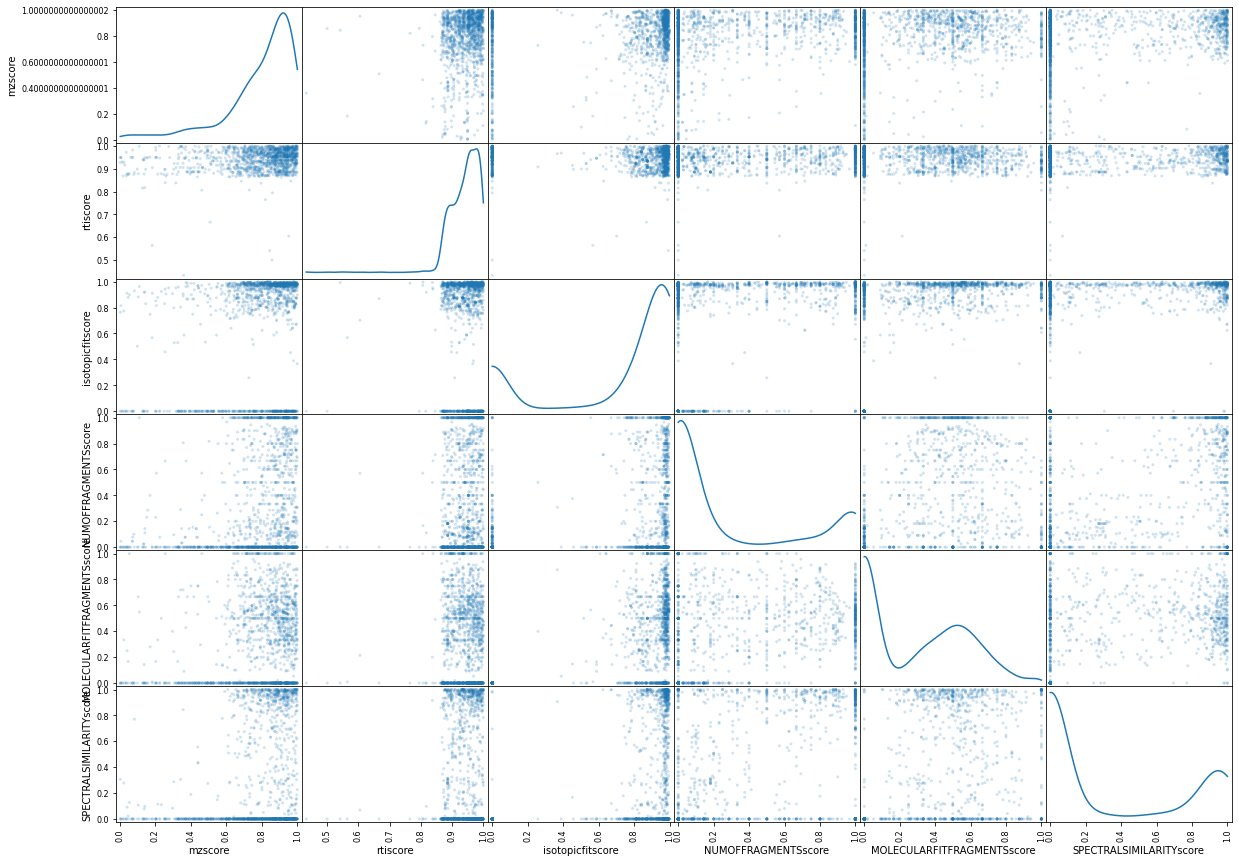

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2, alpha=0.2, figsize=(20, 15), diagonal='kde');

Split the response variable in two bins

In [16]:
y = pd.DataFrame(df, columns=['Spiked'])
y = y.values.tolist()

y_flatlist = []
for sublist in y:
    for item in sublist:
        y_flatlist.append(item)
        
y_array = pd.cut(x=np.array(y_flatlist), bins=2)
y_array

[(-0.001, 0.5], (-0.001, 0.5], (-0.001, 0.5], (-0.001, 0.5], (-0.001, 0.5], ..., (-0.001, 0.5], (-0.001, 0.5], (-0.001, 0.5], (-0.001, 0.5], (-0.001, 0.5]]
Length: 1424
Categories (2, interval[float64]): [(-0.001, 0.5] < (0.5, 1.0]]

In [17]:
y_df = pd.DataFrame(y_array, columns=['Spiked'])
y_df['code'] = pd.factorize(y_df['Spiked'])[0] + 1
response_y = y_df['code']
response_y

0       1
1       1
2       1
3       1
4       1
       ..
1419    1
1420    1
1421    1
1422    1
1423    1
Name: code, Length: 1424, dtype: int64

In [18]:
response_y.__class__

pandas.core.series.Series

# Application of various models

In [19]:
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from time import time
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [20]:
y=response_y
X=df2

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [22]:
X_train

,mzscore,rtiscore,isotopicfitscore,NUMOFFRAGMENTSscore,MOLECULARFITFRAGMENTSscore,SPECTRALSIMILARITYscore
402,0.951262,0.98278,0.98709,0.727273,0.45455,0.984327
53,0.997278,0.95304,0.97997,0.000000,0.00000,0.000000
775,0.981747,0.94824,0.96039,1.000000,0.45000,0.901197
780,0.909677,0.98499,0.98708,0.800000,0.43902,0.934668
225,0.926569,0.99890,0.96676,0.714286,0.60714,0.966062
...,...,...,...,...,...,...
2,0.879361,0.95312,0.81199,0.000000,0.71429,0.000000
277,0.920243,0.99673,0.97231,0.400000,0.54545,0.389121
51,0.442711,0.88705,0.00000,0.000000,0.00000,0.000000
95,0.822466,0.92279,0.00000,0.000000,0.00000,0.000000


In [23]:
models = []
models.append(('SVM',  SVC(gamma='auto')))
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('NB',  GaussianNB()))
models.append(('RF',  RandomForestClassifier()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))

In [24]:
#The scoring function to use
#Error in each class is equal, dataset classes are balanced
#Micro-average evaluation measure is suitable
scoring = 'f1_score'
#scoring = 'accuracy'

In [29]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=make_scorer(f1_score, average='weighted'))
  results.append(cv_results)
  names.append(name)
  print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

SVM: 0.725215 (+/- 0.054283)
 LR: 0.719665 (+/- 0.041113)
 NB: 0.713865 (+/- 0.027164)
 RF: 0.786352 (+/- 0.039303)
kNN: 0.769113 (+/- 0.030929)
 DT: 0.731730 (+/- 0.038557)


<IPython.core.display.Javascript object>


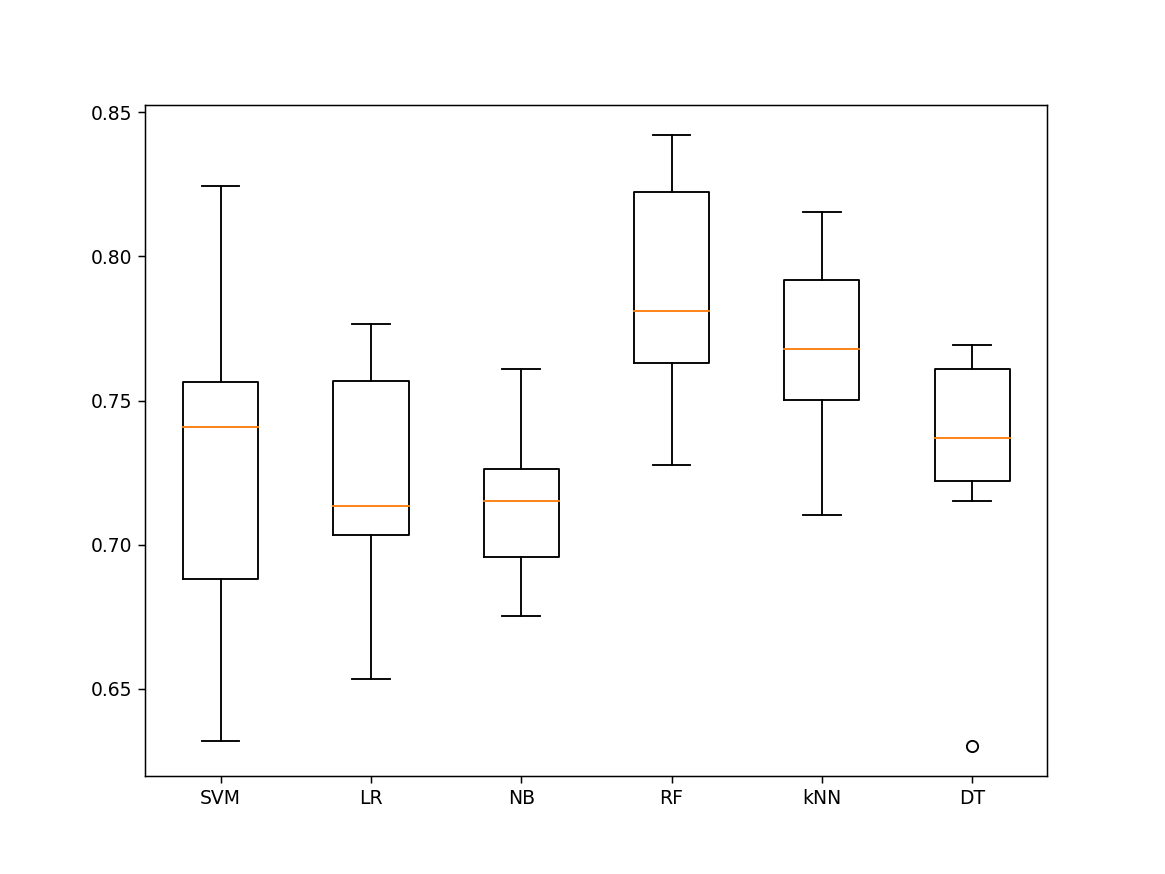

In [30]:
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

# RF

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 40)]
# Number of features to consider at every split
max_features = ['auto', 'log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 50, num = 20)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 50, num = 20)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 35, 60, 86, 111, 136, 162, 187, 213, 238, 263, 289, 314, 340, 365, 390, 416, 441, 466, 492, 517, 543, 568, 593, 619, 644, 670, 695, 720, 746, 771, 796, 822, 847, 873, 898, 923, 949, 974, 1000], 'max_features': ['auto', 'log2', 'sqrt'], 'max_depth': [2, 7, 12, 18, 23, 28, 34, 39, 44, 50, None], 'min_samples_split': [1, 3, 6, 8, 11, 13, 16, 19, 21, 24, 26, 29, 31, 34, 37, 39, 42, 44, 47, 50], 'min_samples_leaf': [1, 3, 6, 8, 11, 13, 16, 19, 21, 24, 26, 29, 31, 34, 37, 39, 42, 44, 47, 50], 'bootstrap': [True, False]}


In [33]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 10 fold cross validation, 
# search across 1000 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 1500, cv = 10, verbose=2, random_state=42, n_jobs = 6)

In [34]:
# Fit the random search model
# Warning. It may take a lot of time
a = rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 1500 candidates, totalling 15000 fits


C:\Users\Nikiforos\anaconda3\envs\IPscore\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.33204719 0.32977933 0.3573115  ... 0.26975173 0.36841045 0.27607743]
  warnings.warn(


In [35]:
opt_results = pd.DataFrame(a.cv_results_).sort_values('rank_test_score')
opt_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
662,1.131184,0.026056,0.055783,0.007350,873,3,3,log2,50,True,...,0.371495,0.472750,0.385833,0.340213,0.523689,0.570468,0.454733,0.404653,0.091374,1
974,1.198627,0.062874,0.053752,0.007485,847,11,3,sqrt,None,False,...,0.342017,0.497939,0.397814,0.339718,0.518023,0.583412,0.480060,0.404131,0.103469,2
47,0.760864,0.057588,0.039163,0.012628,568,8,3,sqrt,39,False,...,0.339581,0.496354,0.402993,0.334505,0.520019,0.584787,0.476928,0.403911,0.103924,3
1396,0.677642,0.021860,0.033174,0.004183,492,8,3,log2,None,False,...,0.336242,0.501474,0.410184,0.330465,0.519682,0.582478,0.478881,0.403768,0.105314,4
729,0.943219,0.048944,0.045814,0.007868,670,8,3,log2,34,False,...,0.341183,0.495922,0.405998,0.331445,0.524583,0.584434,0.479779,0.403676,0.105449,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.135565,0.007157,0.000000,0.000000,517,1,13,log2,50,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496
1267,0.140017,0.014974,0.000000,0.000000,517,1,34,log2,50,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1497
198,0.115314,0.009871,0.000000,0.000000,416,1,19,sqrt,39,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1498
1013,0.262863,0.024498,0.000000,0.000000,923,1,37,sqrt,44,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1499


In [36]:
opt_results.to_csv('opt_results.csv')

In [37]:
a.best_params_

{'n_estimators': 873,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': True}

To determine if random search yielded a better model, we compare the base model with the best random search model.

In [38]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [39]:
optimized_model = RandomForestRegressor(n_estimators= 873, 
                                        min_samples_split= 3,
                                        min_samples_leaf= 3,
                                        max_features= 'log2',
                                        max_depth= 50,
                                        bootstrap= True)


optimized_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features='log2', min_samples_leaf=3,
                      min_samples_split=3, n_estimators=873)

In [40]:
optimized_model_evaluation = evaluate(optimized_model, X_test, y_test)

Model Performance
Average Error: 0.2859 degrees.
Accuracy = 79.16%.


In [41]:
import time
import numpy as np

In [42]:
start_time = time.time()
importances = optimized_model.feature_importances_

In [43]:
std = np.std([
    optimized_model.feature_importances_ for optimized_model in optimized_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 4.079 seconds


<IPython.core.display.Javascript object>


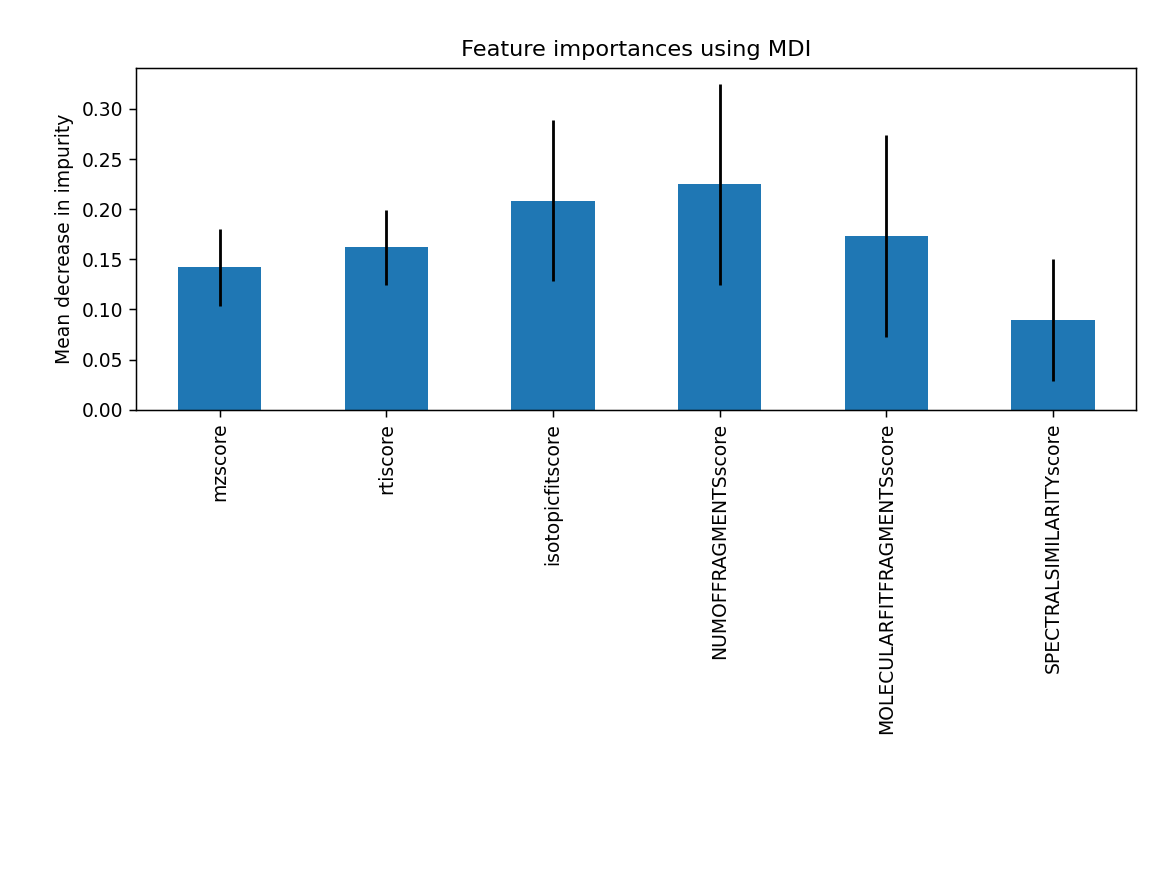

In [44]:
import pandas as pd
optimized_model_importances = pd.Series(importances, index=list(df2.columns.values.tolist()))

fig, ax = plt.subplots()
optimized_model_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [45]:
# Get feature importances
importances = optimized_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in optimized_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. Feature %d (%s): %f" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Feature 3 (NUMOFFRAGMENTSscore): 0.224622
2. Feature 2 (isotopicfitscore): 0.208583
3. Feature 4 (MOLECULARFITFRAGMENTSscore): 0.173457
4. Feature 1 (rtiscore): 0.161860
5. Feature 0 (mzscore): 0.141975
6. Feature 5 (SPECTRALSIMILARITYscore): 0.089503


In [46]:
predicted= optimized_model.predict(X_test)
predicted[0:4]

array([1.81024978, 1.39311743, 1.07180398, 1.07108197])

In [47]:
predicted=np.round(predicted,decimals=0)
predicted

array([2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1.,
       1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1.,
       1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 2.,
       1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2.,
       2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2.,
       1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1., 1.,
       2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1.,
       1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1.,
       1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2.,
       1., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1.,
       2., 2., 1., 1., 2.

In [48]:
y_test

659     2
71      1
342     1
1128    1
1391    1
       ..
698     2
1142    1
201     1
630     2
1235    1
Name: code, Length: 285, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix, precision_score
matrix = confusion_matrix(y_test, predicted)
print(matrix)

[[121  18]
 [ 32 114]]


<IPython.core.display.Javascript object>


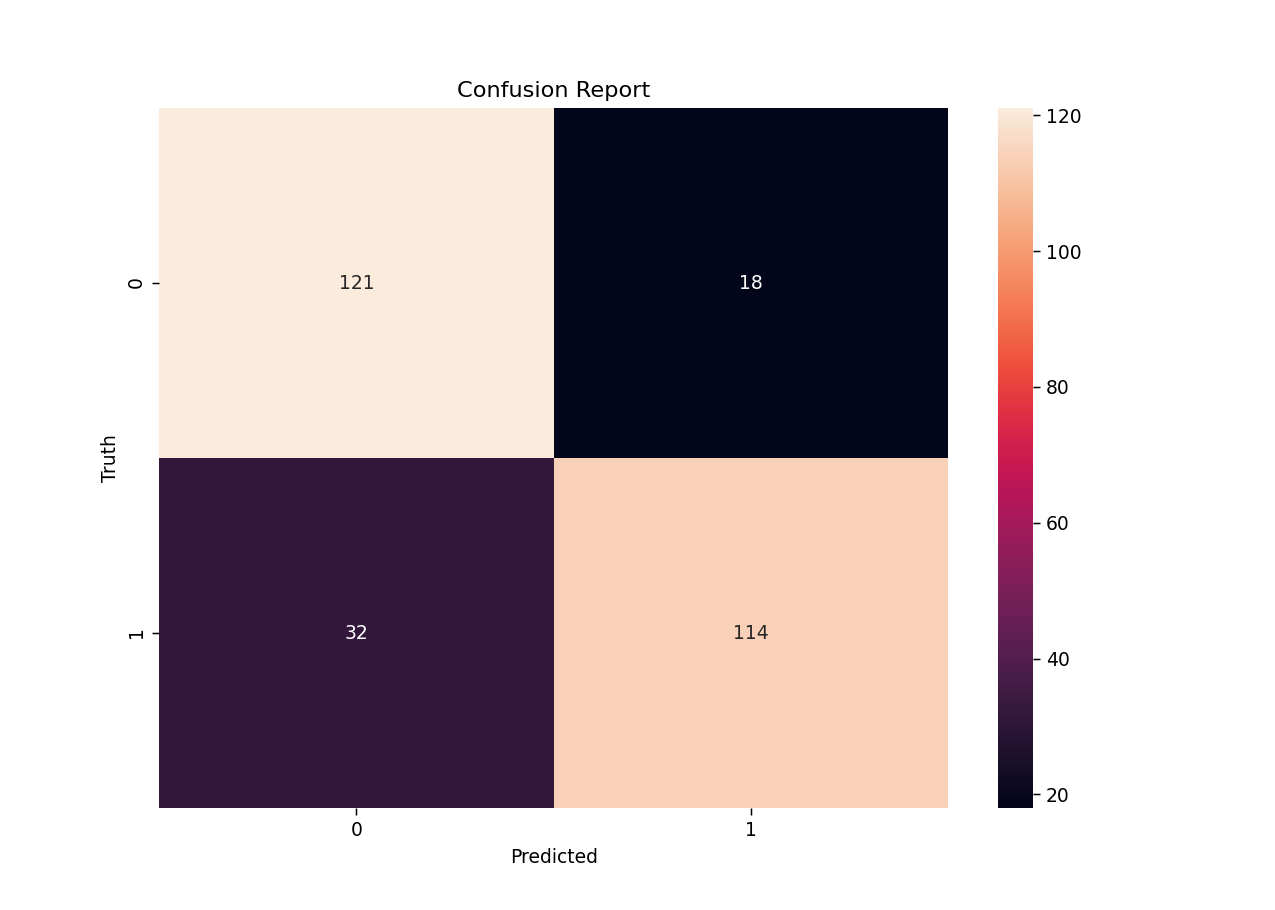

In [50]:
cmrforest = confusion_matrix(y_test, predicted)
plt.figure(figsize=(7,5))
sns.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Report')
plt.show()

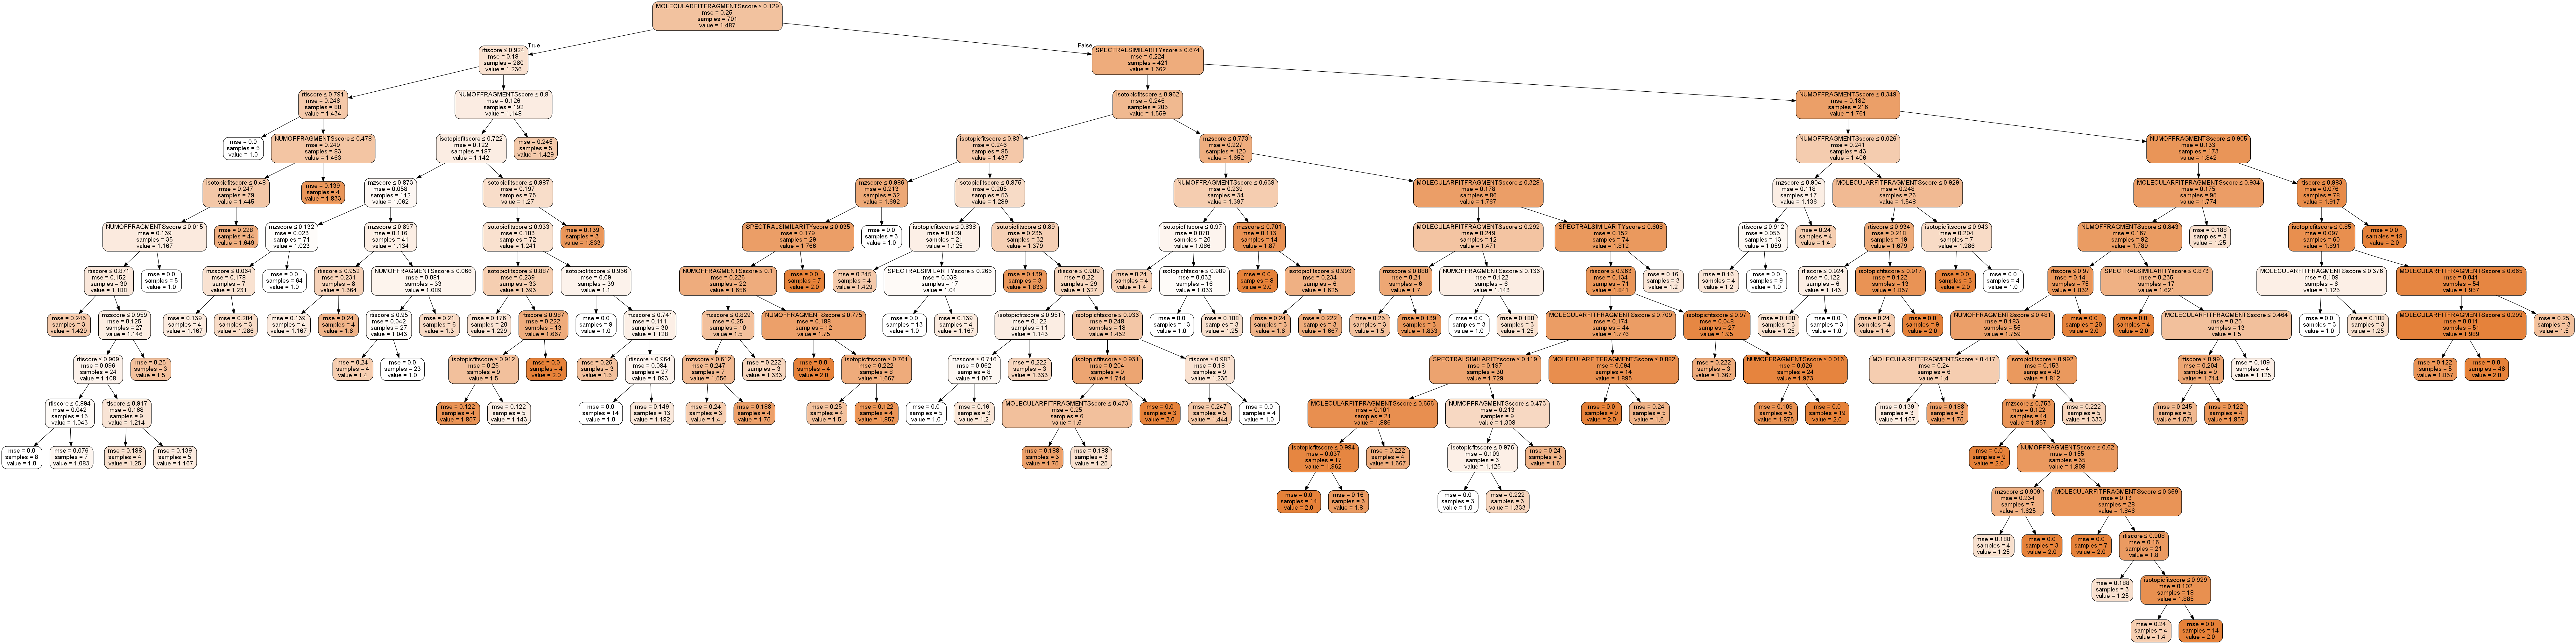

In [51]:
# Extract single tree
estimator = optimized_model.estimators_[6]

from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,
                feature_names=features,  
                class_names=['Not sufficient','Sufficient'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [52]:
#Save the environment of variables
import dill
dill.dump_session('IP_score_All_ENVIRONMENT.db')